In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn as sk
import zipfile
from PIL import Image
import os
import zipfile
from PIL import Image
import json
import pandas as pd

In [17]:
imgzip = zipfile.ZipFile('data/' + "train_data.zip")
inflist = imgzip.infolist()

In [19]:
# load image
images = {}
jsons = {}

for f in (inflist):
  if 'jpg' in f.filename:
    ifile = imgzip.open(f)
    images[f.filename] = Image.open(ifile)

In [23]:
for f in (inflist):
  if 'json' in f.filename:
    ifile = imgzip.open(f)
    jsons[f.filename] = json.load(ifile)

In [46]:
df_images = pd.DataFrame({'Id_Image':[x for x in images.keys()]})
df_images['image_int'] = df_images['Id_Image'].str.replace('\.jpg','').astype(np.int64)

df_images.sort_values('image_int')

C:\Users\afore\AppData\Local\Temp\ipykernel_32232\1748644737.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_images['image_int'] = df_images['Id_Image'].str.replace('\.jpg','').astype(np.int64)


Id_Image  image_int
4757      2.jpg          2
5575      3.jpg          3
7377      5.jpg          5
8271      6.jpg          6
9153      7.jpg          7
...         ...        ...
4731  17413.jpg      17413
4732  17414.jpg      17414
4733  17415.jpg      17415
4734  17416.jpg      17416
4735  17417.jpg      17417

[10791 rows x 2 columns]

In [54]:
df_images[df_images['image_int']>=15000]

Id_Image  image_int
2770  15000.jpg      15000
2771  15001.jpg      15001
2772  15003.jpg      15003
2773  15004.jpg      15004
2774  15005.jpg      15005
...         ...        ...
4731  17413.jpg      17413
4732  17414.jpg      17414
4733  17415.jpg      17415
4734  17416.jpg      17416
4735  17417.jpg      17417

[1946 rows x 2 columns]

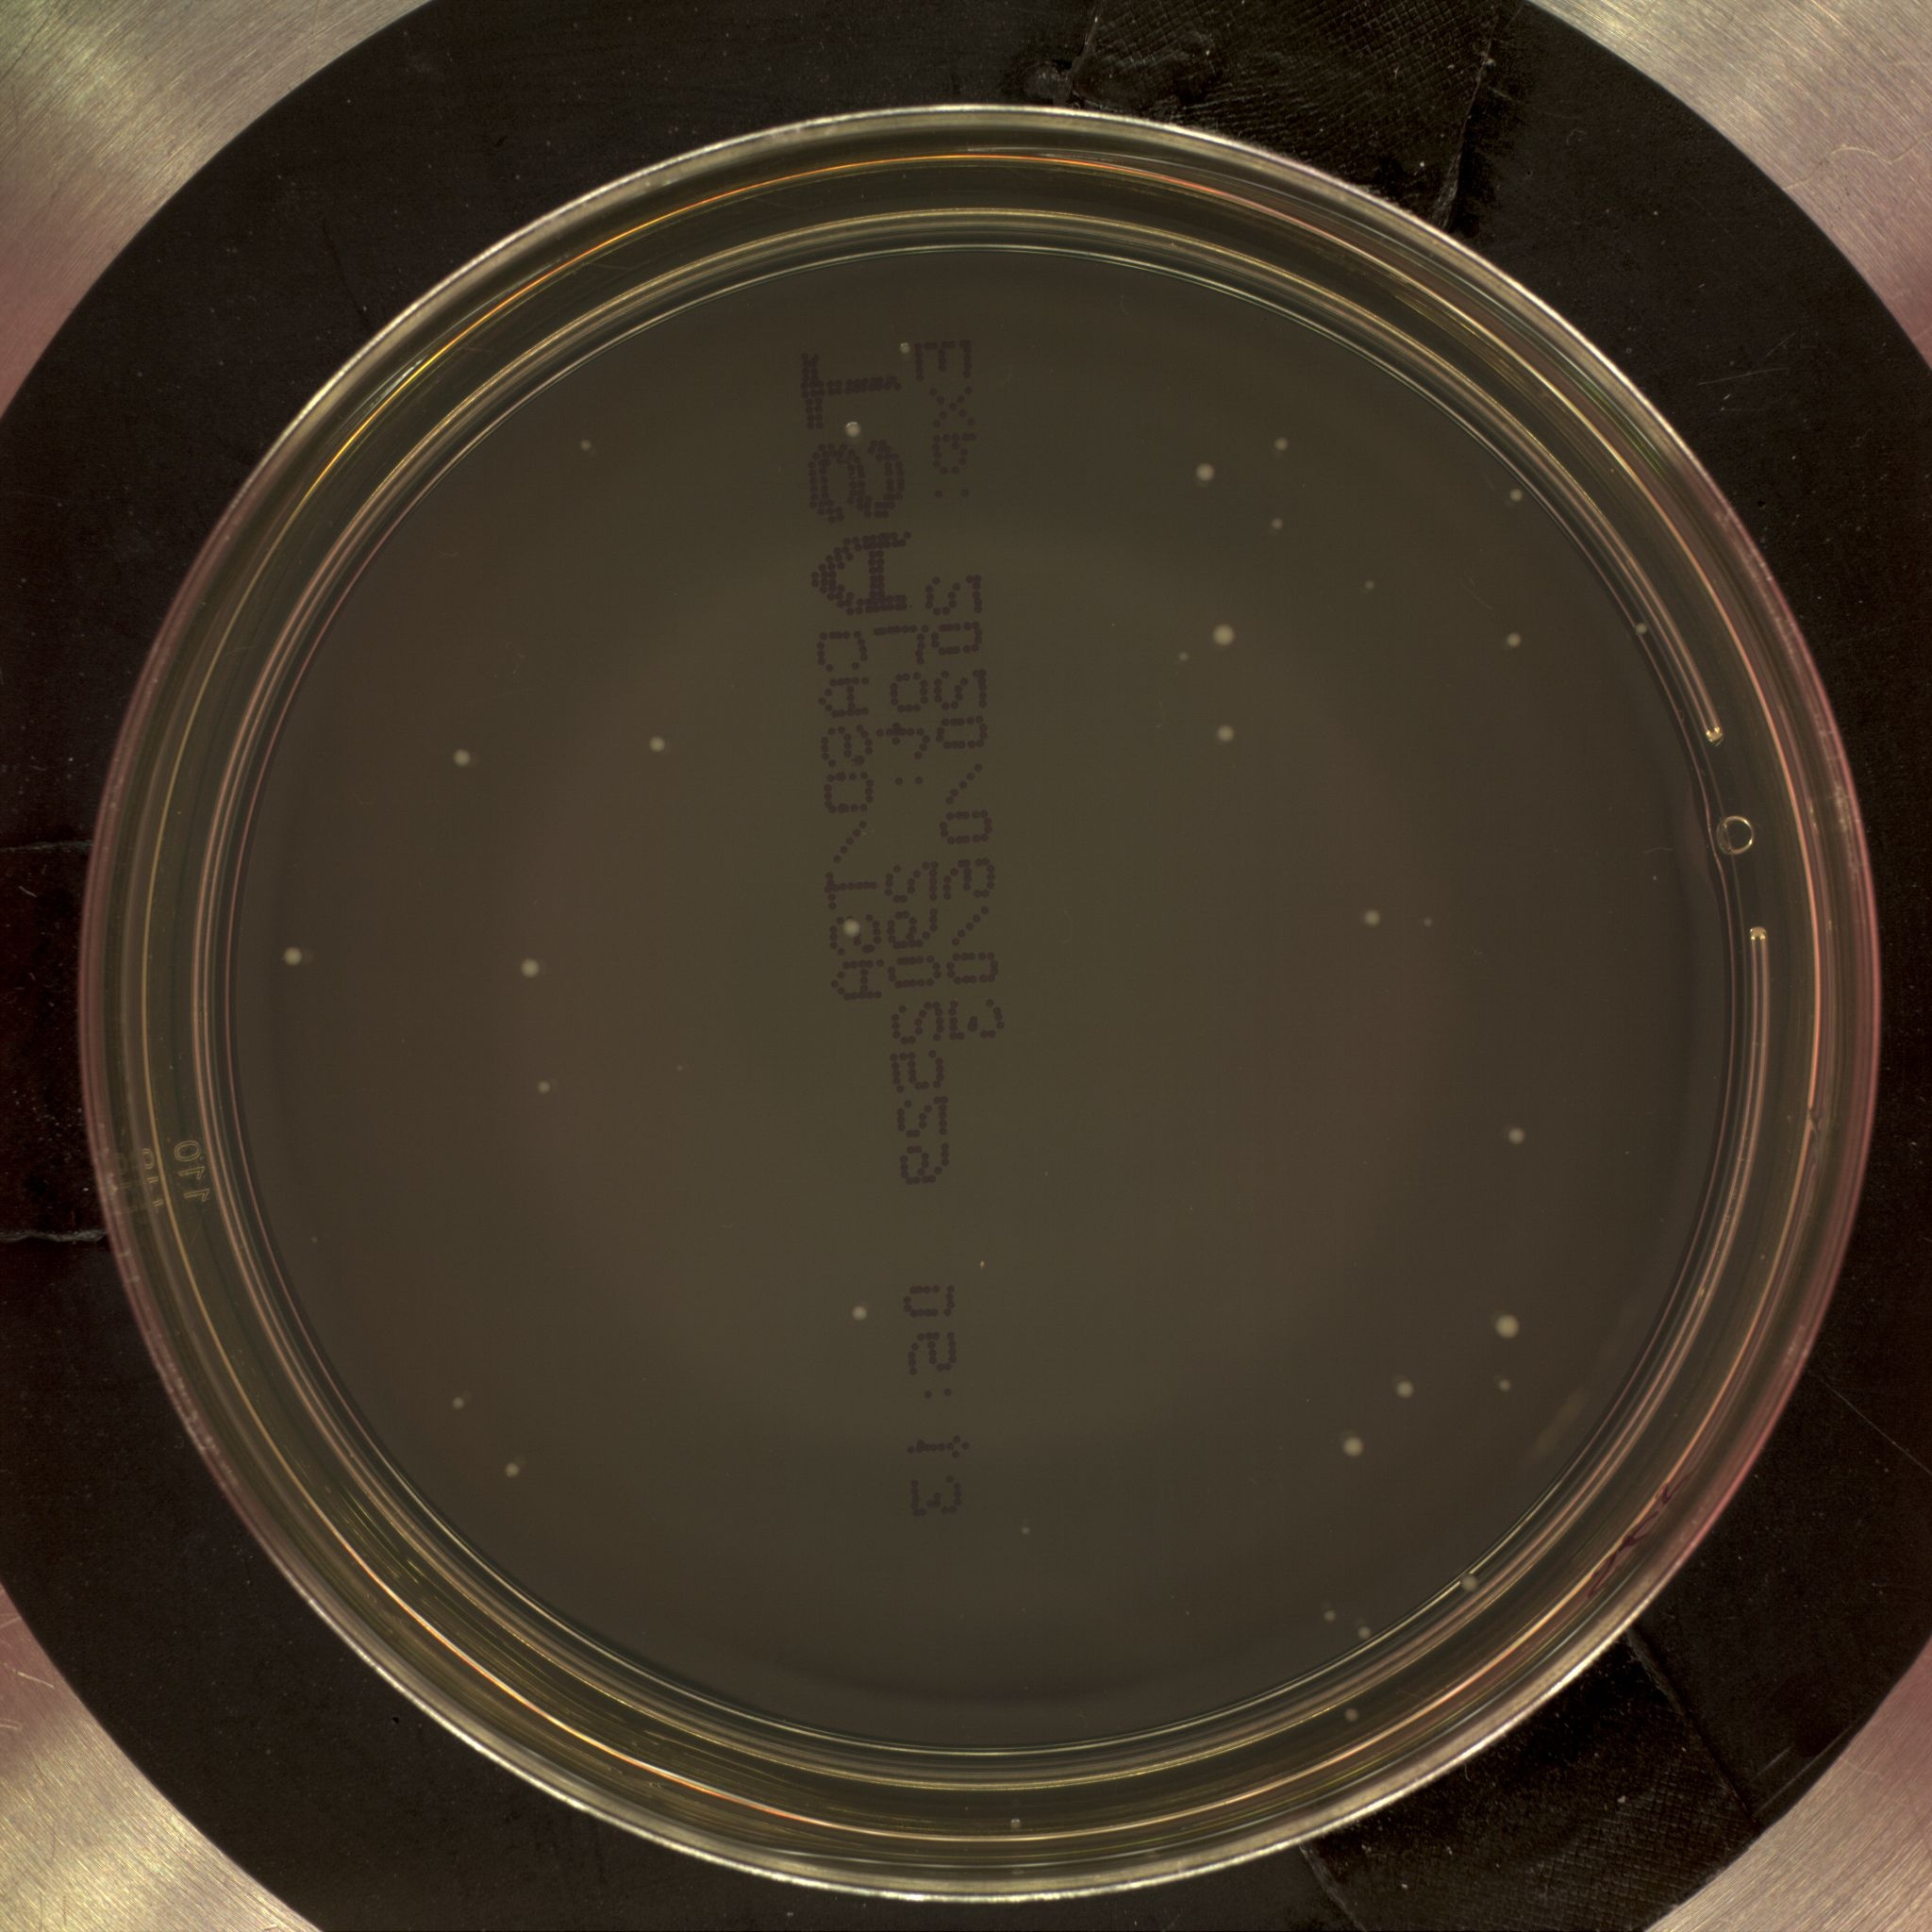

In [55]:
images['15003.jpg']

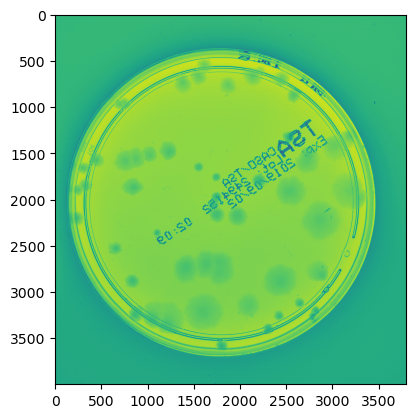

In [ ]:
img = cv.imread("data/train_data/408.jpg", 0)
plt.imshow(img)

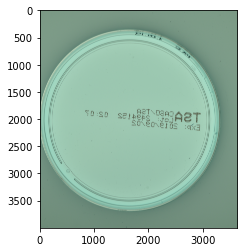

In [33]:
numpy_array = np.array(images['100.jpg'])
bgr_image = cv.cvtColor(numpy_array, cv.COLOR_RGB2BGR)
plt.imshow(bgr_image)

In [29]:
numpy_array

array([[[130, 150, 122],
        [131, 151, 123],
        [132, 151, 123],
        ...,
        [134, 153, 121],
        [135, 154, 122],
        [135, 154, 122]],

       [[130, 150, 122],
        [132, 152, 124],
        [134, 153, 125],
        ...,
        [133, 152, 120],
        [135, 154, 122],
        [135, 154, 122]],

       [[128, 148, 120],
        [130, 150, 122],
        [132, 152, 124],
        ...,
        [134, 153, 121],
        [135, 154, 122],
        [136, 155, 123]],

       ...,

       [[122, 141, 111],
        [122, 141, 111],
        [121, 140, 110],
        ...,
        [123, 142, 114],
        [122, 141, 113],
        [122, 141, 113]],

       [[124, 143, 113],
        [123, 142, 112],
        [122, 141, 111],
        ...,
        [121, 140, 112],
        [121, 140, 112],
        [121, 140, 112]],

       [[124, 143, 113],
        [123, 142, 112],
        [122, 141, 111],
        ...,
        [122, 141, 113],
        [122, 141, 113],
        [124, 143, 115]]

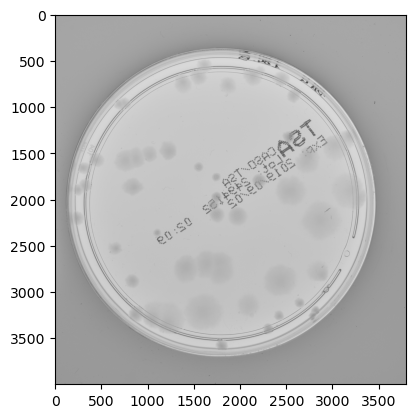

In [4]:
#blur the image
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
#blur = cv.GaussianBlur(cimg,(151,151),150)
plt.imshow(cimg)

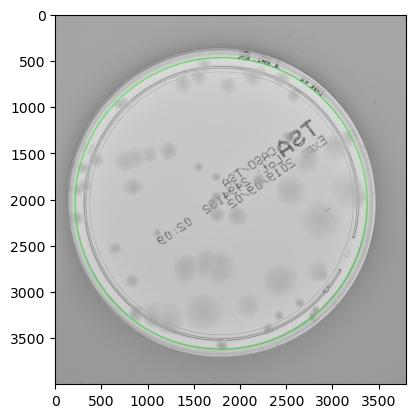

In [5]:
circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 
                          4, 10000, param1=200, param2=200, 
                          minRadius=1500, maxRadius=1800)

circles = np.uint16(np.around(circles)) #round the values to whole numbers and make them of type int

for c in circles[0, :]:
    cv.circle(cimg, (c[0], c[1]), c[2], (0, 255, 0), 5) #draw the outer circle
    cv.circle(cimg, (c[0], c[1]), 1, (0, 0, 255), 5) #draw circle center

plt.imshow(cimg)

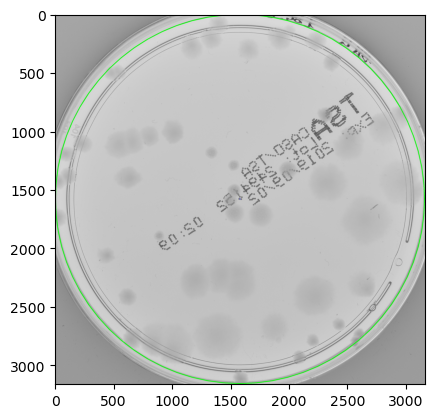

In [7]:
import cv2
import numpy as np

# Load the image
image = cimg

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of colors for the petri dish (green color)
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Threshold the HSV image to get only green colors (the petri dish)
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove small noise
min_area = 1000  # Adjust as needed
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Crop and save bounding boxes
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    
    # Crop the bounding box region
    cropped_image = image[y:y+h, x:x+w]
    
    #show the cropped image
    plt.imshow(cropped_image)

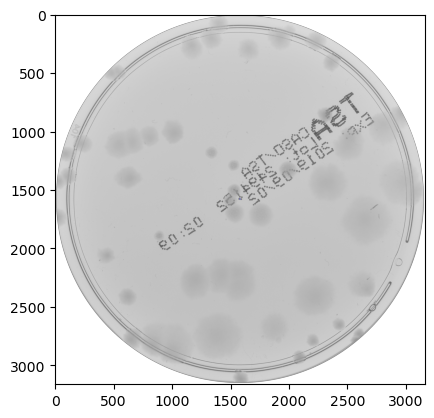

In [11]:
import cv2
import numpy as np

def mask_circle(image):
    # Get image dimensions
    height, width = image.shape[:2]

    # Create a black image with alpha channel
    mask = np.zeros((height, width, 4), dtype=np.uint8)

    # Calculate circle parameters
    center = (width // 2, height // 2)
    radius = min(center[0], center[1])-10

    # Draw the circle on the mask
    cv2.circle(mask, center, radius, (255, 255, 255, 255), -1)

    # Set the alpha channel of the input image to 0 outside the circle
    image_with_alpha = np.concatenate((image, np.full((height, width, 1), 255, dtype=np.uint8)), axis=-1)
    image_with_alpha[mask[:, :, 3] == 0] = [0, 0, 0, 0]

    return image_with_alpha

# Example usage
image_with_alpha = mask_circle(cropped_image)

# Display or save the resulting image
plt.imshow(image_with_alpha)

In [ ]:
# cut out the green rim